In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from gensim.models import KeyedVectors

word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [3]:
from nltk.corpus import stopwords

# Removing stop words
stop_words = stopwords.words('english')

### Benign 50 - Intermediate 50 Texts MIXED
<br> Alternate benign and intermediate texts
<br> 483 benign and 482 intermediate texts (over 4 samples)

In [4]:
my_text = []
f = open('38_ben50int50_mixed','r', encoding = "UTF-8")

for line in f:
    my_text.append(line.strip())
#my_text

In [5]:
text_tokenized = []
for sentence in my_text:
    sentence = sentence.lower().split()
    text_tokenized.append(sentence)

In [6]:
text_tokenized_new = []
for line in text_tokenized:
    line = [w for w in line if w not in stop_words]
    text_tokenized_new.append(line)

In [7]:
len(text_tokenized_new)

1002

In [8]:
import time
text_score = []
start = time.time()
for i in range(0,len(text_tokenized_new)-1):
    distance = word2vec.wmdistance(text_tokenized_new[i], text_tokenized_new[i+1])
    text_score.append(distance)
    #print(f'Distance between sentence {i+1} and sentence {i+2} is: {distanc
end = time.time()
time1 = end - start
print(f"Time taken to run WMD is {time1}")

Time taken to run WMD is 20.51764726638794


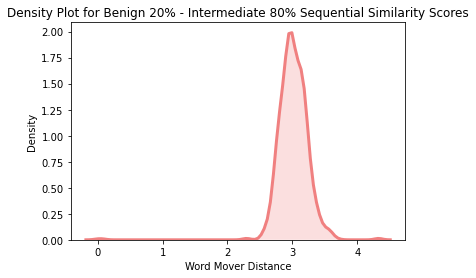

In [9]:
# Density Plot and Histogram of all benign scores
start = time.time()
sns.distplot(text_score, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.05, 1.2),ylim=(0, 18))
end = time.time()
plt.title('Density Plot for Benign 20% - Intermediate 80% Sequential Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')
time2 = end - start

Text(0, 0.5, 'Density')

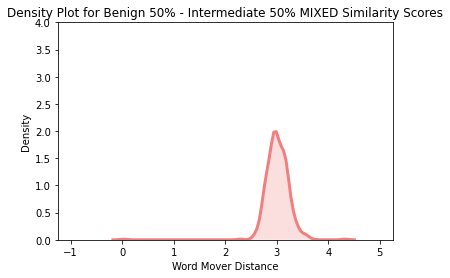

In [10]:
sns.distplot(text_score, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-1.25, 5.25),ylim=(0, 4))
plt.title('Density Plot for Benign 50% - Intermediate 50% MIXED Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

In [11]:
max(text_score)

4.326792258744763

Text(0, 0.5, 'Density')

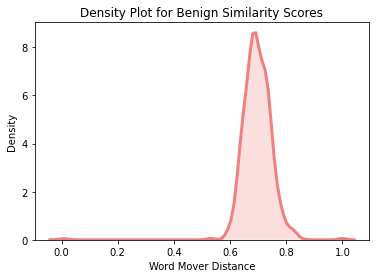

In [12]:
all_score = []
for i in text_score:
    all_score.append(i)

min_val =  min(all_score)
max_val = max(all_score)
for i, val in enumerate(all_score):
    all_score[i] = (val-min_val) / (max_val - min_val)

sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3})#.set(xlim=(-0.1, 1.1),ylim=(0, 8.5))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

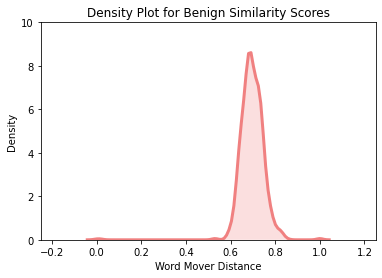

In [13]:
sns.distplot(all_score, hist=False, kde=True, 
             bins=int(180/5), color = 'lightcoral', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True , 'linewidth': 3}).set(xlim=(-0.25, 1.25),ylim=(0, 10))
plt.title('Density Plot for Benign Similarity Scores')
plt.xlabel('Word Mover Distance')
plt.ylabel('Density')

In [14]:
with open('38_ben50int50_mixed_new_norm.txt', 'w') as f:
    for item in all_score:
        f.write("%s\n" % item)